In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# import chart_studio.plotly as py
# chart studio replaces ploty which is depricated
#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
# Figure out how to use matplotlib

import numpy as np
import pandas as pd
import scipy
import time 


<hr>
Modified   By   Reason <br>
14-Jan-23  CBL  Original, https://plotly.com/python/v3/fft-filters/


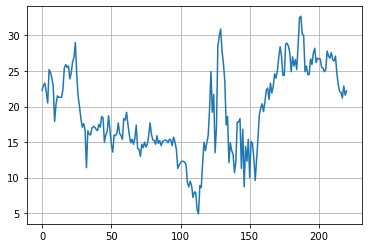

In [15]:
"""
Read the data
"""
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
df = data[0:10]
#table = py.figure_factory.create_table(df)
#py.iplot(table, filename='wind-data-sample')
x = list(range(len(list(data['10 Min Std Dev']))))
plt.plot(x, data['10 Min Sampled Avg'])
plt.grid()

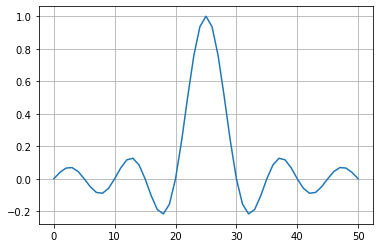

In [23]:
"""
Now test the resulting low pass system
exmample here: https://plotly.com/python/v3/fft-filters/

fc is the cutoff frequency as a fraction of the sampling rate, and b is the 
transition band also as a function of the sampling rate. N must be an odd number 
in our calculation as well.
"""
fc = 0.1
b  = 0.08
N  = int(np.ceil((4 / b)))
if not N % 2: N += 1
n  = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
plt.plot(list(range(len(sinc_func))),sinc_func)
plt.grid()

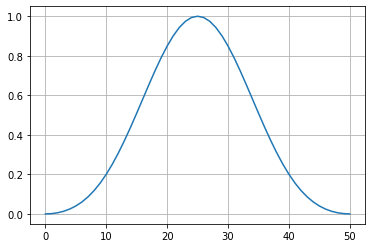

In [25]:
"""
What is this window??
"""
window    = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)
plt.plot(list(range(len(window))), window)
plt.grid()

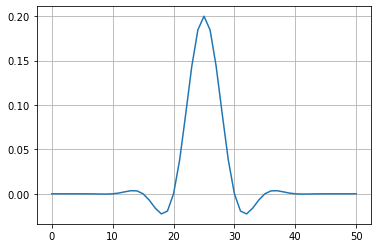

In [27]:
plt.plot(list(range(len(sinc_func))),sinc_func)
plt.grid()

What this appears to do is create the equivalent of a gaussian curve to truncate the
sinc function and the result is used as a filter by convolvoing it with the actual signal. 

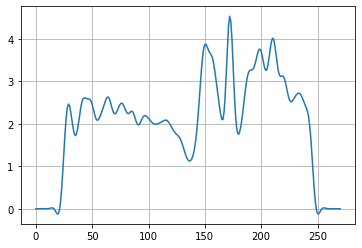

In [28]:
s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

x = list(range(len(new_signal)))
plt.plot(x, new_signal)
plt.grid()

#trace_data = [trace1]
#fig = go.Figure(data=trace_data, layout=layout)
#py.iplot(fig, filename='fft-low-pass-filter')


Now lets do the same with a high pass filter. 

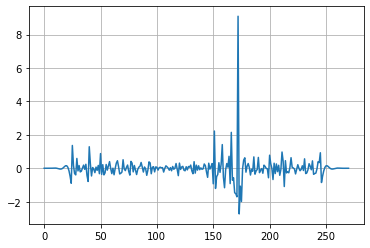

In [29]:
fc = 0.1
b  = 0.08
N  = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)

sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window    = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[int((N - 1) / 2)] += 1

s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

x=list(range(len(new_signal)))
plt.plot(x, new_signal)
plt.grid()



And the bandpass filter

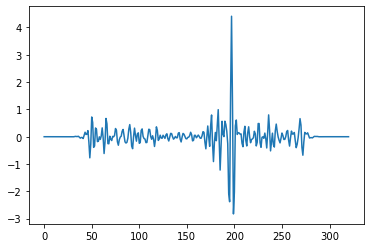

In [30]:
fL = 0.1   # low frequency as fracton of sample rate
fH = 0.3   # high frequency as fraction of sample rate
b  = 0.08
N  = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n  = np.arange(N)

# low-pass filter
hlpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hlpf *= np.blackman(N)
hlpf = hlpf / np.sum(hlpf)

# high-pass filter 
hhpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hhpf *= np.blackman(N)
hhpf = hhpf / np.sum(hhpf)
hhpf = -hhpf
hhpf[int((N - 1) / 2)] += 1

h = np.convolve(hlpf, hhpf)
s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, h)
x=list(range(len(new_signal)))
plt.plot(x, new_signal)
